In [ ]:
pip install split-folders

In [ ]:
from tensorflow import keras
from keras.applications import densenet
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import Dense,Dropout, GlobalAveragePooling2D,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
import json
from keras import regularizers
from google.colab import files
import h5py
import pickle
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import loadtxt
import tensorflow.keras
from PIL import Image, ImageOps
%matplotlib inline
import pandas as pd
import cv2
import os
import shutil
import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_save = '/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN/Anulata'
if os.path.isdir(root_save) == 1:
  print ('done')
else:
  print('False')

done


Buat folder class

In [ ]:
url = '/content/drive/MyDrive/MODEL DL HOYA/DATA/MENTAH_CROP/'
dirlist = os.listdir(url)
for dir in dirlist : #ada

  try :
      os.makedirs('/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN/'+dir, exist_ok = True)
  except OSError as error:
    print("Directory '%s' can not be created" %dir)

**RESIZE CITRA**

In [ ]:
root = '/content/drive/MyDrive/HOYA/DAUN20/B/'
root_save = '/content/drive/MyDrive/HOYA/DAUN20/'
os.path.isdir(root_save)
list_dir = os.listdir(root) # your directory path
print(list_dir)
for dir in list_dir : #ada
  if os.path.isdir(root_save+dir)== 0:
    try :
      os.makedirs(root_save+dir, exist_ok = True)
    except OSError as error:
      print("Directory '%s' can not be created" %dir)
  list_file = os.listdir(root + dir + '/') # your directory path
  print(list_file)
  for file_name in list_file:
    url = root + dir + os.sep + file_name
    print(url)
    img = cv2.imread(url, cv2.IMREAD_UNCHANGED)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print('Original Dimensions : ',img.shape)

    scale_percentx = 150/img.shape[0]
    scale_percenty = 150/img.shape[1] # percent of original size
    width = round(RGB_img.shape[0] * scale_percentx)
    height = round(RGB_img.shape[1] * scale_percenty)
    dim = (width, height)

      # resize image
    resized = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)
    url_save = root_save + dir + os.sep + file_name
      #print('url_save',url_save)
    cv2.imwrite(url_save, cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    print('resize Dimensions : ',resized.shape)


['A']
['29.JPG', '28.JPG', '27.JPG', '26.JPG', '21.JPG', '25.JPG', '23.JPG', '22.JPG', '19.JPG', '20.JPG', '24.JPG', '18.JPG', '17.JPG']
/content/drive/MyDrive/HOYA/DAUN20/B/A/29.JPG
Original Dimensions :  (145, 145, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/DAUN20/B/A/28.JPG
Original Dimensions :  (254, 254, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/DAUN20/B/A/27.JPG
Original Dimensions :  (265, 219, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/DAUN20/B/A/26.JPG
Original Dimensions :  (204, 204, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/DAUN20/B/A/21.JPG
Original Dimensions :  (214, 214, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/DAUN20/B/A/25.JPG
Original Dimensions :  (281, 281, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/DAUN20/B/A/23.JPG
Original Dimensions :  (280, 280, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/HOYA/DAUN20/B/

In [ ]:
image_size = 150
batch_size = 32

Jumlah Data

In [ ]:
url = '/content/drive/MyDrive/HOYA/DAUN20/DATA'
list_dir = os.listdir(url)
list_dir.sort()
Total=0
for dir in list_dir:
  print(dir)
  listfile = os.listdir(url+'/'+dir)
  print(len(listfile))
  Total = Total+len(listfile)
  #for f in listfile:
  #  n = os.listdir(url+dir+'/'+f)
print(Total)

Amicabilis
22
Anulata
21
Australis
29
Callistophylla
29
Dolichosparte
29
Garut 1
20
Gunung Lawu Lumajang
24
Hypolasia
23
Incurvula
25
Mamasa
32
Minahassae
28
Monetteae
35
Obovata
24
Polypus
25
Polypus kalteng
22
Rigidifolia
21
Surisana
21
Towutiensis
41
Unchinata
33
Vitellina
26
Vittelinoides
34
Walicii ssp Tenebrosa
21
campanulata white
35
caudata
25
occultata silver
21
waymaniae
35
701


In [ ]:
splitfolders.ratio("/content/drive/MyDrive/HOYA/DAUN20/DATA", # The location of dataset
                   output="/content/drive/MyDrive/HOYA/DAUN20/train/", # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .2, .1), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )


Copying files: 0 files [00:00, ? files/s]
Copying files: 9 files [00:00, 71.17 files/s]
Copying files: 19 files [00:00, 82.86 files/s]
Copying files: 28 files [00:00, 74.19 files/s]
Copying files: 39 files [00:00, 84.59 files/s]
Copying files: 48 files [00:00, 81.79 files/s]
Copying files: 57 files [00:00, 83.69 files/s]
Copying files: 66 files [00:00, 59.90 files/s]
Copying files: 73 files [00:02, 17.73 files/s]
Copying files: 78 files [00:03, 11.85 files/s]
Copying files: 82 files [00:04,  8.69 files/s]
Copying files: 85 files [00:04,  7.86 files/s]
Copying files: 87 files [00:05,  7.25 files/s]
Copying files: 89 files [00:05,  6.93 files/s]
Copying files: 91 files [00:05,  6.63 files/s]
Copying files: 93 files [00:06,  6.09 files/s]
Copying files: 94 files [00:06,  5.16 files/s]
Copying files: 95 files [00:06,  5.04 files/s]
Copying files: 96 files [00:07,  4.77 files/s]
Copying files: 97 files [00:07,  3.88 files/s]
Copying files: 98 files [00:07,  3.50 files/s]
Copying files: 99 

In [ ]:
url = "/content/drive/MyDrive/HOYA/DAUN20/train/"
list_dir = os.listdir(url)
#print(len(list_dir))
for dir in list_dir :
  listtrain = os.listdir(url+dir)
  print(dir)
  sum = 0
  for list_file in listtrain:

    f = os.listdir(url+dir+'/'+list_file)
    print(len(f))
    sum = sum+len(f)
  print('total = ',sum)


train
17
16
14
14
20
23
20
16
24
28
20
15
17
19
17
14
24
15
16
22
18
23
14
14
24
14
total =  478
val
5
4
4
4
5
6
5
4
7
8
5
4
5
5
5
4
7
4
4
6
5
6
4
4
7
4
total =  131
test
3
4
3
3
4
5
4
3
4
5
4
3
3
4
3
3
4
3
4
4
3
4
3
3
4
2
total =  92


In [ ]:
# folders with train dir & val dir
train_dir = '/content/drive/MyDrive/HOYA/DAUN20/train/train'
val_dir = '/content/drive/MyDrive/HOYA/DAUN20/train/val'
test_dir = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
#
input_shape = (image_size, image_size, 3)


augmented data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                              samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip = True,
                              vertical_flip = True,
                              height_shift_range= 0.05,
                              width_shift_range=0.2,
                              rotation_range=5,
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.2)

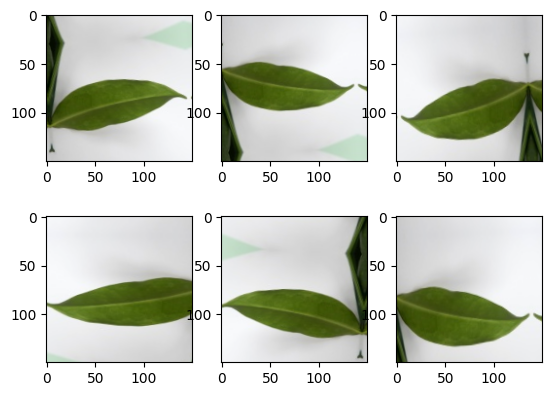

In [ ]:
root = '/content/drive/MyDrive/MODEL DL HOYA/DATA/OLAH/DAUN10/DATA/'
os.path.isdir(root)
list_dir = os.listdir(root) # your directory path
list_dir[1]
for dir in list_dir : #ada
  list_file = os.listdir(root + dir + '/') # your directory path
  for file_name in list_file:
    url = root + dir + os.sep + file_name
    img = image.load_img(url, target_size=(image_size, image_size))
    #plt.imshow(img)
    #plt.show()
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 1
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(2,3,i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 7 == 0:
            break
    break;

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 478 images belonging to 26 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 131 images belonging to 26 classes.


In [ ]:
val_generator.class_indices

{'Amicabilis': 0,
 'Anulata': 1,
 'Australis': 2,
 'Callistophylla': 3,
 'Dolichosparte': 4,
 'Garut 1': 5,
 'Gunung Lawu Lumajang': 6,
 'Hypolasia': 7,
 'Incurvula': 8,
 'Mamasa': 9,
 'Minahassae': 10,
 'Monetteae': 11,
 'Obovata': 12,
 'Polypus': 13,
 'Polypus kalteng': 14,
 'Rigidifolia': 15,
 'Surisana': 16,
 'Towutiensis': 17,
 'Unchinata': 18,
 'Vitellina': 19,
 'Vittelinoides': 20,
 'Walicii ssp Tenebrosa': 21,
 'campanulata white': 22,
 'caudata': 23,
 'occultata silver': 24,
 'waymaniae': 25}

In [ ]:
#optional
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 92 images belonging to 26 classes.


In [ ]:
base_model121 = densenet.DenseNet121(weights='/content/drive/MyDrive/HOYA/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)


In [ ]:
base_model169 = densenet.DenseNet169(weights='/content/drive/MyDrive/MODEL DL HOYA/dense/densenet169_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)


In [ ]:
base_model121.output

<KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'relu')>

In [ ]:
base_model169.output

<KerasTensor: shape=(None, None, None, 1664) dtype=float32 (created by layer 'relu')>

In [ ]:
classes_num = 26 #numberclass we have
validation_steps = 100

In [ ]:
x = base_model121.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(16, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
preds = Dense(classes_num, activation='softmax')(x)

In [ ]:
x = base_model169.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(16, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
preds = Dense(classes_num, activation='softmax')(x)

In [ ]:
x

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dropout_23')>

In [ ]:
preds

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_39')>

In [ ]:
model = Model(inputs=base_model121.input, outputs=preds)


# cetak arsitektur
print(len(model.layers))
print(model.summary())

# mengatur parameter yang tidak akan diubah (freeze) dan diubah (unfreeze)
n_freeze = 300

for layer in model.layers[:n_freeze]:
    layer.trainable=False

for layer in model.layers[n_freeze:]:
    layer.trainable=True


opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

435
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                       

In [ ]:
model = Model(inputs=base_model169.input, outputs=preds)


# cetak arsitektur
print(len(model.layers))
print(model.summary())

# mengatur parameter yang tidak akan diubah (freeze) dan diubah (unfreeze)
n_freeze = 300

for layer in model.layers[:n_freeze]:
    layer.trainable=False

for layer in model.layers[n_freeze:]:
    layer.trainable=True


opt = keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_generator

TESTING MODEL

In [ ]:
cls_val = val_generator.classes
cls_test = test_generator.classes
val_labels=np.array(cls_val)
test_labels=np.array(cls_test)
print(val_labels)
print(test_labels)

[ 0  0  0  0  1  1  1  1  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5
  5  6  6  6  6  7  7  7  7  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10
 10 11 11 11 11 11 11 11 12 12 12 12 13 13 13 13 13 14 14 14 14 15 15 15
 15 16 16 16 16 17 17 17 17 17 17 17 17 18 18 18 18 18 18 19 19 19 19 19
 20 20 20 20 20 20 21 21 21 21 22 22 22 22 22 22 22 23 23 23 23 23 24 24
 24 24 25 25 25 25 25 25 25]
[ 0  0  0  1  1  1  2  2  3  3  3  3  4  4  4  4  5  5  6  6  6  6  7  7
  7  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11 12 12 12 12 13 13 13 14
 14 14 15 15 15 16 16 16 17 17 17 17 17 18 18 18 18 19 19 19 20 20 20 20
 20 21 21 21 22 22 22 22 23 23 23 24 24 24 25 25 25 25]


MODEL IDENTIFICATION

In [ ]:
# menyimpan model terbaik sebagai model baru
filepath = "/content/drive/MyDrive/HOYA/Pretrain.densenet.hdf5"

metric = 'val_accuracy'
checkpoint = ModelCheckpoint(filepath, monitor=metric, verbose=2, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

step_size_train = 100

history=model.fit(train_generator, epochs=150, validation_data=val_generator)
#history = model.fit(train_generator, ytrain, epochs=100,validation_data = (test_generator, yval))

print(history.history.keys())

with open('/content/drive/MyDrive/HOYA/proses.json', 'w') as f:
    json.dump(history.history, f)


#save model akhir

model.save('/content/drive/MyDrive/HOYA/arsitektur_daun_densenet121.h5')

model.save_weights('/content/drive/MyDrive/HOYA/new_weights_daun_densenet121.h5')

Epoch 1/150
15/15 [==============================] - 72s 5s/step - loss: 1.8850 - accuracy: 0.7008 - val_loss: 2.8625 - val_accuracy: 0.6336
Epoch 2/150
15/15 [==============================] - 74s 5s/step - loss: 1.9430 - accuracy: 0.7029 - val_loss: 2.5660 - val_accuracy: 0.6489
Epoch 3/150
15/15 [==============================] - 71s 5s/step - loss: 1.7790 - accuracy: 0.7197 - val_loss: 2.7093 - val_accuracy: 0.6412
Epoch 4/150
15/15 [==============================] - 72s 5s/step - loss: 1.8606 - accuracy: 0.7092 - val_loss: 2.7040 - val_accuracy: 0.6489
Epoch 5/150
15/15 [==============================] - 65s 4s/step - loss: 1.8916 - accuracy: 0.6946 - val_loss: 2.8328 - val_accuracy: 0.6260
Epoch 6/150
15/15 [==============================] - 62s 4s/step - loss: 1.8741 - accuracy: 0.7092 - val_loss: 3.0902 - val_accuracy: 0.5954
Epoch 7/150
15/15 [==============================] - 63s 4s/step - loss: 1.8890 - accuracy: 0.7071 - val_loss: 3.2348 - val_accuracy: 0.5267
Epoch 8/150
1

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/HOYA/arsitektur_daun_densenet121.h5')
#model.save('/content/drive/MyDrive/PENGENALAN POLA/arsiktektur_densenet121.h5')
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                           

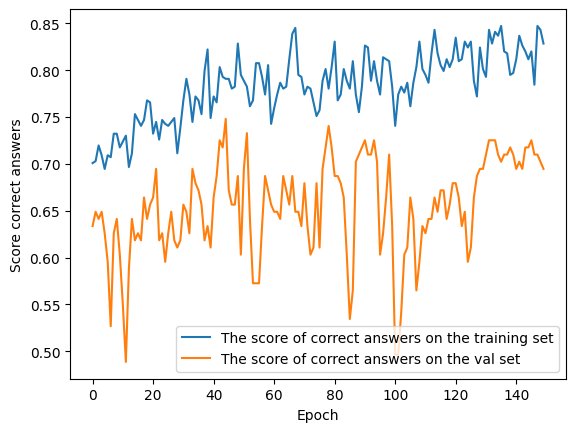

In [ ]:
plt.plot(history.history['accuracy'], label='The score of correct answers on the training set')
plt.plot(history.history['val_accuracy'], label='The score of correct answers on the val set')
plt.xlabel('Epoch')
plt.ylabel('Score correct answers')
plt.legend()
plt.show()

In [ ]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(val, val_labels)

print('Test accuracy:', test_acc)

Predict

In [ ]:
img_path = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
dir_class = os.listdir(img_path)
for f in dir_class:
  file_img = os.listdir(img_path+'/'+f)
  for i in file_img :
    url_img = img_path+ '/'+f+'/'+i
    print(url_img)
    img = image.load_img(url_img, target_size=(image_size, image_size))
    plt.imshow(img)
    plt.show()
    break;

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
class_names=val_generator.class_indices
print(class_names)

{'Amicabilis': 0, 'Anulata': 1, 'Australis': 2, 'Callistophylla': 3, 'Dolichosparte': 4, 'Garut 1': 5, 'Gunung Lawu Lumajang': 6, 'Hypolasia': 7, 'Incurvula': 8, 'Mamasa': 9, 'Minahassae': 10, 'Monetteae': 11, 'Obovata': 12, 'Polypus': 13, 'Polypus kalteng': 14, 'Rigidifolia': 15, 'Surisana': 16, 'Towutiensis': 17, 'Unchinata': 18, 'Vitellina': 19, 'Vittelinoides': 20, 'Walicii ssp Tenebrosa': 21, 'campanulata white': 22, 'caudata': 23, 'occultata silver': 24, 'waymaniae': 25}


In [ ]:
akurasi = 0
y_pred = np.array([])
img_path = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
dir_class = os.listdir(img_path)
dir_class.sort()
for f in dir_class:
  file_img = os.listdir(img_path+'/'+f)
  for i in file_img :
    url_img = img_path+ '/'+f+'/'+i
    img = image.load_img(url_img, target_size=(image_size, image_size))
    img_array = image.img_to_array(img)
    img_array /= 255
    img_test= np.expand_dims(img_array, axis=0)
    result = new_model.predict(img_test)
    hasil=np.argmax(result,axis=1)
    y_pred = np.append(y_pred, int(hasil))
    cls = dir_class[int(hasil)]

    print ([f+ ' prediksi ' + cls])
    if f == cls:
      akurasi +=1
print('Akurasi = ', akurasi/92)

1/1 [==============================] - 3s 3s/step
['Amicabilis prediksi Amicabilis']
1/1 [==============================] - 0s 127ms/step
['Amicabilis prediksi Garut 1']
1/1 [==============================] - 0s 123ms/step
['Amicabilis prediksi Amicabilis']
1/1 [==============================] - 0s 127ms/step
['Anulata prediksi waymaniae']
1/1 [==============================] - 0s 118ms/step
['Anulata prediksi Anulata']
1/1 [==============================] - 0s 112ms/step
['Anulata prediksi Anulata']
1/1 [==============================] - 0s 119ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 126ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 108ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 125ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 117ms/step
['Callistophylla prediksi Callistophylla']
1/1 [==============================] - 0s 129ms/step
[

In [ ]:
prediction = new_model.predict(test_generator)

3/3 [==============================] - 15s 3s/step


In [ ]:
STEP_SIZE_TEST = test_generator.batch_size
score = new_model.evaluate_generator(generator = test_generator, steps=STEP_SIZE_TEST)
print ("%s: %.2f%%" % (new_model.metrics_names[1], score[1]*100))

<ipython-input-66-d1aa13eb4e96>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = new_model.evaluate_generator(generator = test_generator, steps=STEP_SIZE_TEST)


accuracy: 76.09%


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support

In [ ]:
y_test = test_generator.classes

print(confusion_matrix(y_test, y_pred))

[[2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 

In [ ]:
img_path = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
dir_class = os.listdir(img_path)
dir_class.sort()
test_label=np.array([])
for f in dir_class:
  test_label = np.append(test_label, f)

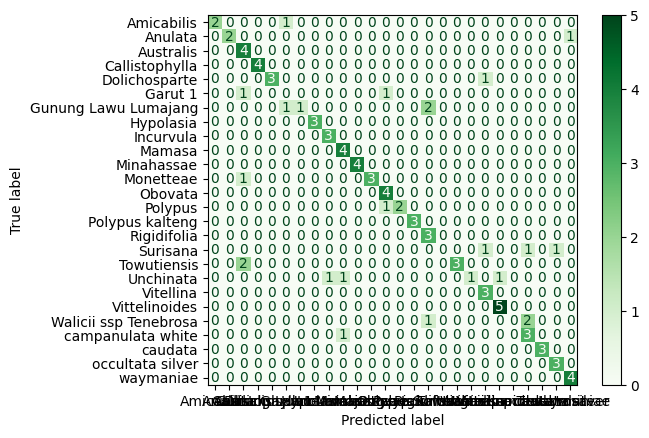

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np




cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_label)

disp.plot(cmap=plt.cm.Greens)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [ ]:
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       1.00      0.67      0.80         3
         2.0       0.50      1.00      0.67         4
         3.0       1.00      1.00      1.00         4
         4.0       1.00      0.75      0.86         4
         5.0       0.00      0.00      0.00         2
         6.0       1.00      0.25      0.40         4
         7.0       1.00      1.00      1.00         3
         8.0       0.75      1.00      0.86         3
         9.0       0.67      1.00      0.80         4
        10.0       1.00      1.00      1.00         4
        11.0       1.00      0.75      0.86         4
        12.0       0.67      1.00      0.80         4
        13.0       1.00      0.67      0.80         3
        14.0       1.00      1.00      1.00         3
        15.0       0.50      1.00      0.67         3
        17.0       1.00      0.60      0.75         5
        18.0       1.00    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
